<a href="https://colab.research.google.com/github/ToobaAhmedAlvi/Data-science/blob/main/MedicalCostAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MEDICAL COST ANALYSIS**

Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance
* In this project, you will be trying to develop an end-to-end data science application using the dataset given above. The aim of the project is to estimate the approximate cost of a person's health insurance based on the given variables. While creating the project, try to follow the instructions below and make sure that the project is unique.

# 1. CREATE A GOOGLE COLABORATORY FILE


1.   Make sure your project has .ipynb extension.

2.   Make sure that there are comment lines explaining the details in your project.

3.   When submitting the project, submit the cells of this .ipynb file so that the cells are run and the results are visible.






# 2. IMPORTING REQUIRED LIBRARIES

1.   Import the required libraries for the project to the Colab environment.

2.   Import Pandas, NumPy, Seaborn, Matplotlib and Sklearn libraries for data analysis



In [33]:
import pandas as pd
import numpy as np
import plotly.express as ex
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [31]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 42)
classifier1.fit(X_train,y_train)
y_pred = classifier1.predict(X_test)

ValueError: ignored

In [2]:
insurance_data = pd.read_csv("../content/insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_data.shape
print('\n')

In [4]:

insurance_data.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

# 3. EXPLORATORY DATA ANALYSIS

> Analyze the data and draw meaningful conclusions from the data.
 

*  Examine the distribution of Bmi (Body Mass Index)
*  Examine the relationship between “smoker” and “charges”
*  Examine the relationship between “smoker” and “region”.
*  Examine the relationship between “bmi” and “sex”.
*  Find the "region" with the most "children".
*  Examine the relationship between “age” and “bmi”.
*  Examine the relationship between “bmi” and “children”.
*  Is there an outlier in the "bmi" variable? Please review.
*  Examine the relationship between “bmi” and “charges”.
*  Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

> Try to use data visualization techniques as much as possible while examining the data.

> Please add the meanings you deduced from the analyzes as a comment line.






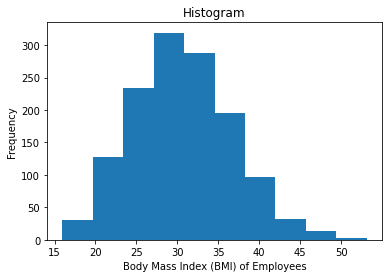

In [5]:
plt.title("Histogram")
plt.xlabel("Body Mass Index (BMI) of Employees")
plt.ylabel("Frequency")

plt.hist(insurance_data.bmi)
plt.show()

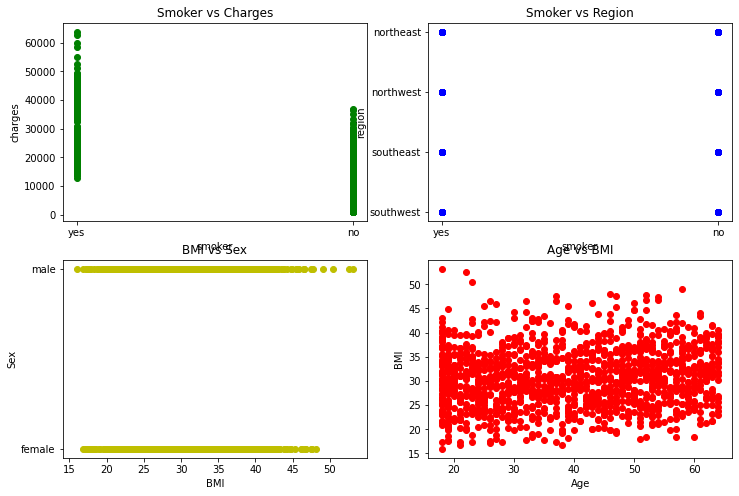

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8)) #creating a grid of 2 rows, 2 columns and 6x6 figure size
plt.subplot(2,2,1)
plt.plot(insurance_data.smoker, insurance_data.charges, "go")
plt.title("Smoker vs Charges") # The top-left axes
plt.xlabel("smoker")
plt.ylabel("charges")

plt.subplot(2,2,2)
plt.plot(insurance_data.smoker, insurance_data.region, "bo") 
plt.title("Smoker vs Region")
plt.xlabel("smoker")
plt.ylabel("region") # The top-right axes
plt.subplot(2,2,3)
plt.plot(insurance_data.bmi, insurance_data.sex, "yo") 
plt.title("BMI vs Sex")
plt.xlabel("BMI")
plt.ylabel("Sex") #The bottom-left axes

plt.subplot(2,2,4)
plt.plot(insurance_data.age, insurance_data.bmi, "ro") # The bottom-right axes
plt.title("Age vs BMI")
plt.xlabel("Age")
plt.ylabel("BMI") # The top-left axes
plt.show()

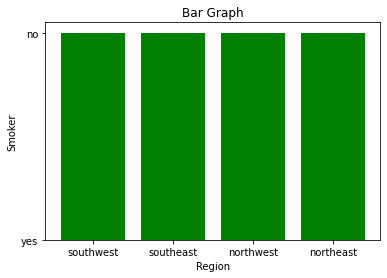

In [7]:

# Using the NumPy arange function to generate values for index between 0-4.
# Here,stop is 5, start is 0, and step is 1

plt.bar( insurance_data.region,insurance_data.smoker, color="green", label="Region")
#plt.bar(index+width, insurance_data.smoker, width, color="blue", label="Smoker")

plt.title("Bar Graph")
plt.xlabel("Region")
plt.ylabel("Smoker")
plt.show()

In [9]:
# Create a DataFrame with 3 columns:
plotdata = pd.DataFrame({
    "Smoker":insurance_data.smoker,
    "bmi":insurance_data.bmi, 
    "region":insurance_data.region,
})
plotdata.head()

,Smoker,bmi,region
0,yes,27.900,southwest
1,no,33.770,southeast
2,no,33.000,southeast
3,no,22.705,northwest
4,no,28.880,northwest


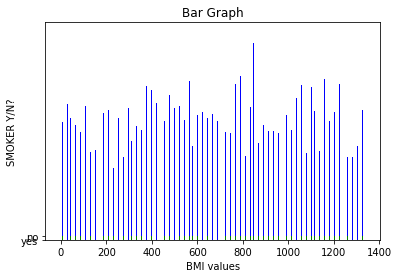

In [10]:
index = np.arange(1338)
width = 0.2

plt.bar(index,plotdata['Smoker'], width, color="green", label="Smoker")
plt.bar(index,plotdata['bmi'], width, color="blue", label="BMI",bottom=plotdata['Smoker'])
plt.title("Bar Graph")
plt.xlabel("BMI values")
plt.ylabel("SMOKER Y/N?")
plt.show()

Text(0.5, 1.0, 'Mince Pie Consumption Study')

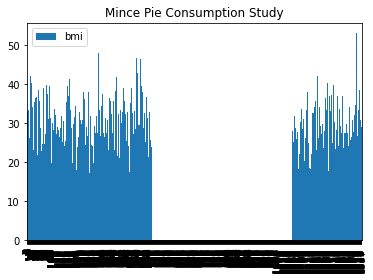

In [11]:
plotdata.plot(kind="bar")
plt.title("Mince Pie Consumption Study")

<BarContainer object of 1338 artists>

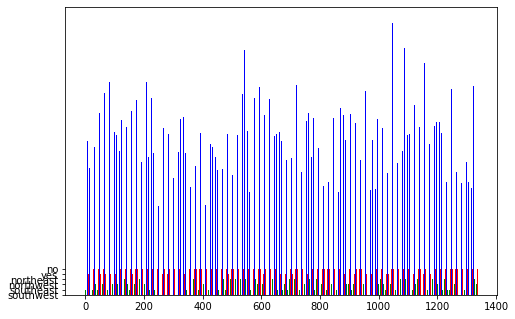

In [12]:

import numpy as np
import matplotlib.pyplot as plt
data = [plotdata['bmi'],
plotdata['region'],
plotdata['Smoker']]
X = np.arange(1338)
fig = plt.figure()
# fig.add_axes() is a list [x0, y0, width, height]
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)


In [ ]:
insurance_data.region

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

# 4. DATA PRE **PROCESSING**

In this section, prepare the data you have, for training the model.
* Use Label Encoding and One-Hot Encoding techniques to deal with categorical
variables.
* Split your dataset into X_train,X_test, y_train, y_test.
* Scale the dataset by normalizing it(Min-Max Scaling or Standard Scaling).


In [13]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['sex','smoker','region']
le = LabelEncoder()
for i in var_mod:
  insurance_data[i] = le.fit_transform(insurance_data[i])

In [14]:
print(insurance_data)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [21]:
insurance_data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [22]:
insurance_data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [19]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
insurance_data.duplicated().sum()

1

In [24]:
insurance_data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
age,19.000,18.0000,28.000,33.00000,32.0000,31.0000,46.0000,37.0000,37.0000,60.00000,...,23.00000,52.000,57.0000,23.00000,52.000,50.0000,18.0000,18.0000,21.000,61.0000
sex,0.000,1.0000,1.000,1.00000,1.0000,0.0000,0.0000,0.0000,1.0000,0.00000,...,0.00000,1.000,0.0000,0.00000,0.000,1.0000,0.0000,0.0000,0.000,0.0000
bmi,27.900,33.7700,33.000,22.70500,28.8800,25.7400,33.4400,27.7400,29.8300,25.84000,...,24.22500,38.600,25.7400,33.40000,44.700,30.9700,31.9200,36.8500,25.800,29.0700
children,0.000,1.0000,3.000,0.00000,0.0000,0.0000,1.0000,3.0000,2.0000,0.00000,...,2.00000,2.000,2.0000,0.00000,3.000,3.0000,0.0000,0.0000,0.000,0.0000
smoker,1.000,0.0000,0.000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,...,0.00000,0.000,0.0000,0.00000,0.000,0.0000,0.0000,0.0000,0.000,1.0000
region,3.000,2.0000,2.000,1.00000,1.0000,2.0000,2.0000,1.0000,0.0000,1.00000,...,0.00000,3.000,2.0000,3.00000,3.000,1.0000,0.0000,2.0000,3.000,1.0000
charges,16884.924,1725.5523,4449.462,21984.47061,3866.8552,3756.6216,8240.5896,7281.5056,6406.4107,28923.13692,...,22395.74424,10325.206,12629.1656,10795.93733,11411.685,10600.5483,2205.9808,1629.8335,2007.945,29141.3603


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5da165dd0>]],
      dtype=object)

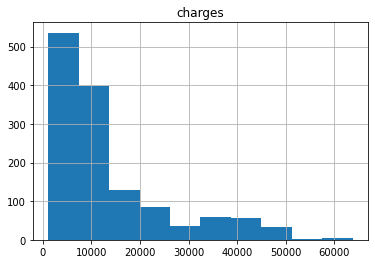

In [25]:
insurance_data.hist("charges")

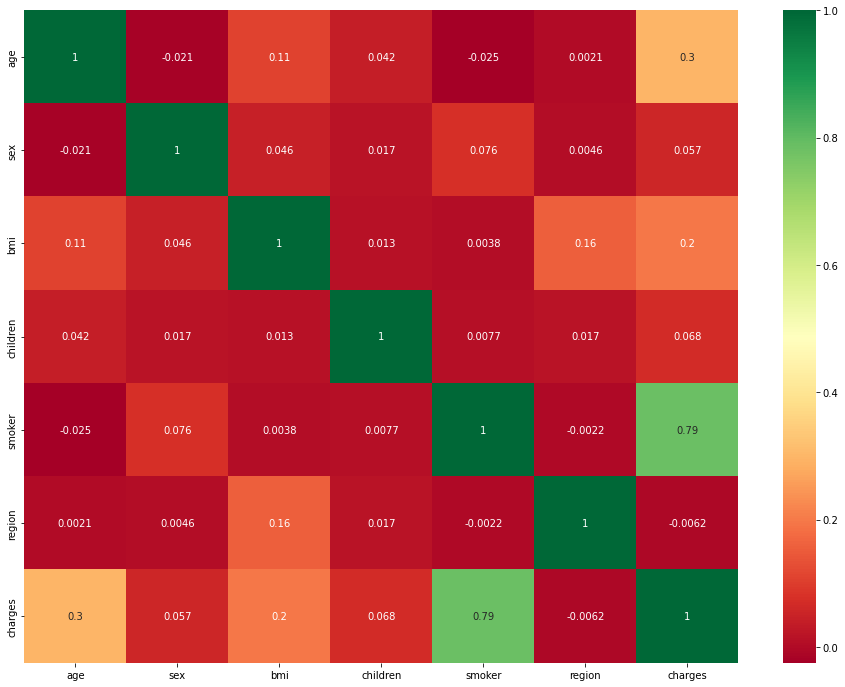

In [34]:
correlation = insurance_data.corr()
plt.figure(figsize=(16,12))
sns.heatmap(correlation ,annot =True, cmap ="RdYlGn")

In [26]:

requiredinput = insurance_data.drop("charges", axis=1)
requiredtarget = insurance_data['charges'].values


In [27]:
print(requiredinput.shape)
print(requiredtarget.shape)

(1338, 6)
(1338,)


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(requiredinput,requiredtarget,test_size=0.3,random_state=0)
print(X_train.shape)
print(X_test.shape)

(936, 6)
(402, 6)


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
model1= OneVsRestClassifier(KNeighborsClassifier())
model1.fit(X_train, y_train)

prediction = model1.predict(X_test)

ValueError: ignored

In [30]:
model1.score(X_test,y_test)
print('Accuracy of Naive Bayes Classifier on training set:{:.2f}'.format(model1.score(X_train, y_train)))
print('Accuracy of Naive Bayes Classifier on test set: {:.2f}'.format(model1.score(X_test, y_test)))

AttributeError: ignored

# 5. MODEL SELECTION

* Select several regression models and train them with the preprocessed data.
* Examine the performances of the selected models using cross validation.
* Choose the best performing model

# 6. HYPER PARAMETER OPTIMIZATION:

* Optimize the hyper-parameters of the model selected in the previous step.
* Optimize parameters with Grid Search. (Grid Search or Randomized Search)

# 7. MODEL EVALUATION

Evaluate the optimized model using regression model evaluation metrics. (Ex. Mean Squared Error, Mean Absolute Error etc.)

# 8. PROJECT DELIVERY
* For the project, you need to prepare a code file with the extension of .ipynb and run all the cells.
* You need to add these files that you have prepared to a GitHub repo and add the link of this repo to the form that is given down below.
* The project will be done as a team. The teams created should be a maximum of 3
people.
* You can send information about your project team via this form.
* Form Link: [(https://forms.gle/mVFcRmhk9magezw26)]
* Deadline: 10.10.2022